Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

Import the dataset

In [2]:
data = pd.read_csv('afg_pop.csv', thousands=',')
#In the dataset, the values are formatted by thousands and, therefore, the imported values would be parsed as strings.
#To avoid that, I used the 'thousands' argument. If the 'thousands' argument was not used, the values would be parsed
#as strings with commas. This can also be solved after importing the dataset with the following code:

#data = data.iloc[:, 1:10].str.replace(',', '').astype('int64')

Inspect the dataset and print out summaries

In [3]:
data.head(10)

,1,CSO_PROV_NA_ENG,TOTAL,TOT_MALE,TOT_FEMALE,URB_TOTAL,URB_MALE,URB_FEMALE,RUR_TOTAL,RUR_MALE,RUR_FEMALE,Unnamed: 11,Unnamed: 12
0,2.0,Kabul,4372977.0,2259199.0,2113778.0,3699866.0,1915023.0,1784843.0,673111.0,344176.0,328935.0,NaN,NaN
1,3.0,Kapisa,441010.0,222554.0,218456.0,1550.0,904.0,646.0,439460.0,221650.0,217810.0,NaN,NaN
2,4.0,Parwan,664502.0,336114.0,328388.0,59554.0,30100.0,29454.0,604948.0,306014.0,298934.0,NaN,NaN
3,5.0,Wardak,596287.0,304324.0,291963.0,3100.0,1550.0,1550.0,593187.0,302774.0,290413.0,NaN,NaN
4,6.0,Logar,392045.0,199447.0,192598.0,9947.0,5038.0,4909.0,382098.0,194409.0,187689.0,NaN,NaN
5,7.0,Nangarhar,1517388.0,776688.0,740700.0,230809.0,118818.0,111991.0,1286579.0,657870.0,628709.0,NaN,NaN
6,8.0,Laghman,445588.0,228323.0,217265.0,5168.0,2713.0,2455.0,440420.0,225610.0,214810.0,NaN,NaN
7,9.0,Panjsher,153487.0,78484.0,75003.0,NaN,NaN,NaN,153487.0,78484.0,75003.0,NaN,NaN
8,10.0,Baghlan,910784.0,466792.0,443992.0,184991.0,94175.0,90816.0,725793.0,372617.0,353176.0,NaN,NaN
9,11.0,Bamyan,447218.0,226669.0,220549.0,12918.0,6459.0,6459.0,434300.0,220210.0,214090.0,NaN,NaN


In [4]:
#Use the pd.option_context function to display the numbers of each column properly. 
with pd.option_context('float_format', '{:.0f}'.format): print(data.describe())

       1   TOTAL  TOT_MALE  TOT_FEMALE  URB_TOTAL  URB_MALE  URB_FEMALE  \
count 33      34        34          34         31        31          31   
mean  18  797099    407795      389304     216066    111270      104795   
std   10  749568    386311      363287     663005    343078      319931   
min    2  147967     75484       72483       1550       904         646   
25%   10  436309    222686      213063      12596      6394        6201   
50%   18  555782    284346      271436      37464     19248       18086   
75%   26  975240    497269      477972     126342     64204       62138   
max   34 4372977   2259199     2113778    3699866   1915023     1784843   

       RUR_TOTAL  RUR_MALE  RUR_FEMALE  Unnamed: 11  Unnamed: 12  
count         34        34          34            0            0  
mean      600098    306342      293756          nan          nan  
std       297098    151274      145840          nan          nan  
min       138366     70803       67563          nan     

In [5]:
#Print out column data types and null/non-null values
data.info()

#Number of rows and columns
print('\nRows, Columns: ', data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
1                  33 non-null float64
CSO_PROV_NA_ENG    34 non-null object
TOTAL              34 non-null float64
TOT_MALE           34 non-null float64
TOT_FEMALE         34 non-null float64
URB_TOTAL          31 non-null float64
URB_MALE           31 non-null float64
URB_FEMALE         31 non-null float64
RUR_TOTAL          34 non-null float64
RUR_MALE           34 non-null float64
RUR_FEMALE         34 non-null float64
Unnamed: 11        0 non-null float64
Unnamed: 12        0 non-null float64
dtypes: float64(12), object(1)
memory usage: 3.9+ KB

Rows, Columns:  (38, 13)


## Data cleaning

As can be seen, the dataset imported contains some useless columns and an unnecessary index column. It also contains four rows at the end that are all 'nan' values. To remove the columns and 'nan' rows:

In [6]:
data.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)
data.drop(['1'], axis=1, inplace=True)
data = data[data.TOTAL.notnull()]

In [7]:
data.columns

Index(['CSO_PROV_NA_ENG', 'TOTAL', 'TOT_MALE', 'TOT_FEMALE', 'URB_TOTAL',
       'URB_MALE', 'URB_FEMALE', 'RUR_TOTAL', 'RUR_MALE', 'RUR_FEMALE'],
      dtype='object')

The dataset columns are not very intuitive. So lets rename them with easily interpretable label:

In [8]:
data.columns = ['Province', 'Total', 'Male', 'Female',
                'Urban', 'Urban_Male', 'Urban_Female',
                'Rural', 'Rural_Male', 'Rural_Female']

Checking missing values in the dataset:

In [9]:
missing = data.isnull().sum()
missing = missing[missing > 0]
print('Missing values:\n', missing)

Missing values:
 Urban           3
Urban_Male      3
Urban_Female    3
dtype: int64


We can inspect the datset to see that there are three rows (provinces) that have missing values:

In [10]:
data.loc[data.isnull().any(axis=1), :]

,Province,Total,Male,Female,Urban,Urban_Male,Urban_Female,Rural,Rural_Male,Rural_Female
7,Panjsher,153487.0,78484.0,75003.0,NaN,NaN,NaN,153487.0,78484.0,75003.0
15,Nooristan,147967.0,75484.0,72483.0,NaN,NaN,NaN,147967.0,75484.0,72483.0
23,Daykundi,424339.0,217930.0,206409.0,NaN,NaN,NaN,424339.0,217930.0,206409.0


This is probably caused by the fact that these three provinces are quite small and, therefore, do not have any major cities and/or towns that can be classified as "urban".

In any case, for the sake of comparison, we'll drop three provinces entirely from the dataset:

In [11]:
data.dropna(axis=0, inplace=True)

# Plotting:

Getting totals population estimates for each column:

In [12]:
totals = pd.DataFrame({
        'totals': ['Total', 'Total Male', 'Total Female',
                  'Total Urban', 'Total Rural'],\
          'sums': [data.Total.sum(), data.Male.sum(),
                   data.Female.sum(), data.Urban.sum(),
                   data.Rural.sum()]
          })
totals

,totals,sums
0,Total,26375572.0
1,Total Male,13493117.0
2,Total Female,12882455.0
3,Total Urban,6698033.0
4,Total Rural,19677539.0


We must be careful not to interpret the sums as very accurate because we removed three provinces already. But we can safely assume that the total population adds to more than 1.5 million approximately.

Let's plot these numbers:

Text(0.5,1,'Totals')

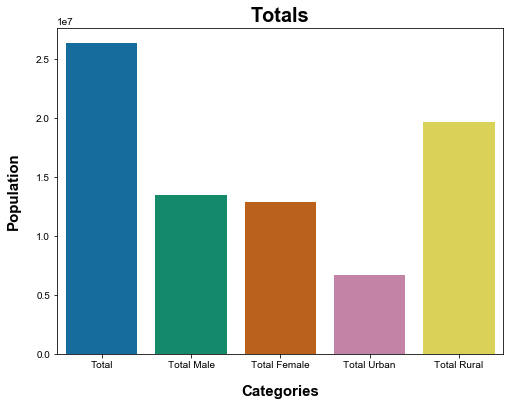

In [13]:
f, ax = plt.subplots(figsize = (8, 6))
sns.set(style='whitegrid', font_scale = 1.25)
sns.barplot(x='totals', y='sums', data=totals, palette='colorblind')
plt.xlabel('Categories', fontsize=15, fontweight='bold', labelpad=15) 
plt.ylabel('Population', fontsize=15, fontweight='bold', labelpad=15)
plt.title('Totals', fontsize=20, fontweight='bold')

We can see that most of the population lives in rural areas and that men slightly outnumber women by a small margin. Lets dig a little deeper and compare male/female and rural/urban pops for each province.

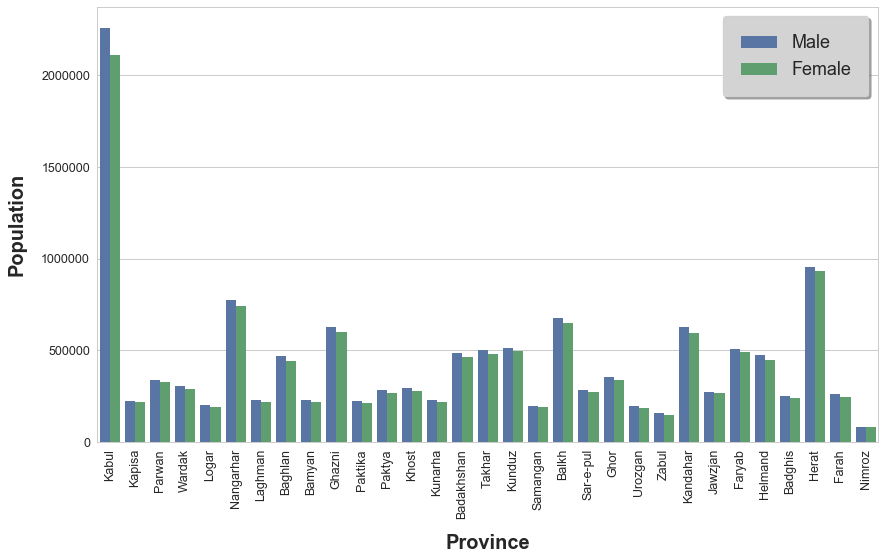

In [14]:
genders = data.loc[:, ['Province', 'Male', 'Female']]

#Tidying the data for barplotting
genders = (
        genders.set_index('Province')
            .stack()
            .reset_index()
            .rename(columns={'level_1': 'Variable', 0: 'Sums'})
        )

f, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x='Province', y='Sums', hue='Variable', data=genders)
plt.xlabel('Province', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Population', fontsize=20, fontweight='bold', labelpad=15)
plt.xticks(rotation=90)
legend = plt.legend(frameon=True, fancybox=True, framealpha=1, 
                    shadow=True, borderpad=1, fontsize='large')
legend.get_frame().set_facecolor('lightgrey')

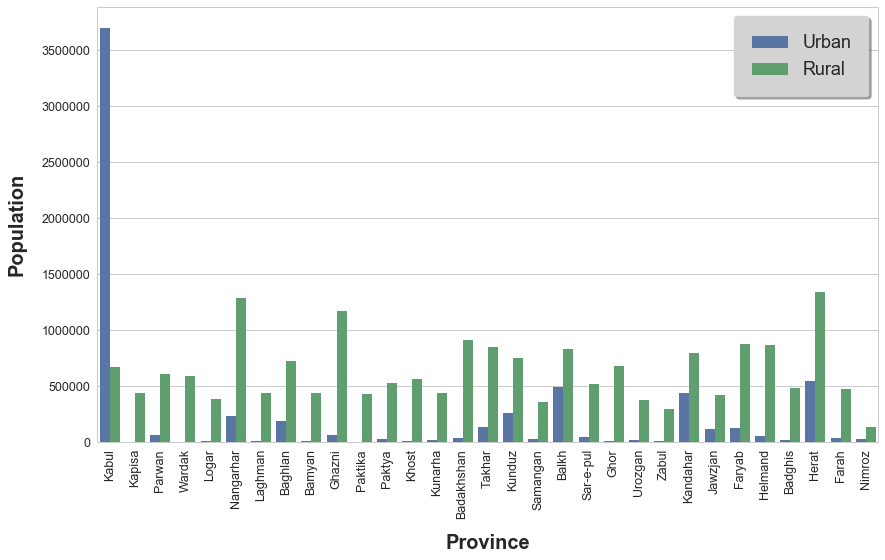

In [15]:
rural_urban = data.loc[:, ['Province', 'Urban', 'Rural']]

#Tidying the data for barplotting
rural_urban = (
        rural_urban.set_index('Province')
            .stack()
            .reset_index()
            .rename(columns={'level_1': 'Variable', 0: 'Sums'})
        )

f, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x='Province', y='Sums', hue='Variable', data=rural_urban)
plt.xlabel('Province', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Population', fontsize=20, fontweight='bold', labelpad=15)
plt.xticks(rotation=90)
legend = plt.legend(frameon=True, fancybox=True, framealpha=1, 
                    shadow=True, borderpad=1, fontsize='large')
legend.get_frame().set_facecolor('lightgrey')

From the last graph, we can see that most of the urbanization has occured in Kabul where the majority of the population lives in urban areas (namely Kabul City). The major provinces (Balkh, Herat, Kandahar) also be seen to have substantial urban population. Herat, Nangarhar, and Ghazni, being the three most important agricultural centers, have the highest number of people living in rural areas.

## Mapping

But the bar charts are not very interesting. Let's plot our population on a map! For this, we'll use geopandas library and ArcGIS Shapefile of Afghanistan's provincial boundaries.

Note: Special thanks to Benjamin Cooley and his <a href='https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d'>awesome tutorial</a> for creating geopandas maps with Python.

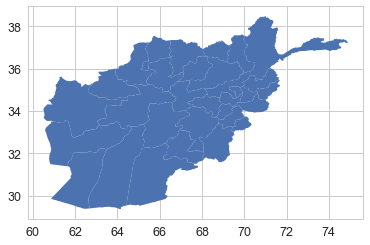

In [16]:
import geopandas as gpd
mapdf = gpd.read_file('AfgMaps/admin2_poly_32.shp')
mapdf.plot()

Map file well imported! The mapdf is  GeoDataFrame and we need to inspect the province names because, for later plotting, we need to join it with our original population dataframe.

In [17]:
mapdf.head()

,AREA,PERIMETER,PRV32_ID,PRV_NAME,UN_ZONES,geometry
0,4.46398,19.11597,11,BADAKHSHAN,1,"POLYGON ((70.5068359375 38.123046875, 70.50678..."
1,1.24419,6.43316,12,TAKHAR,1,"POLYGON ((69.33357238769531 37.1372184753418, ..."
2,1.19200,6.10249,17,JAWZJAN,1,"POLYGON ((65.49161529541016 37.23888778686523,..."
3,1.73879,7.18234,16,BALKH,1,"POLYGON ((66.48699951171875 37.33544921875, 66..."
4,0.81247,4.55180,14,KUNDUZ,1,"POLYGON ((68.03881072998047 36.93278121948242,..."


As we can see, the province names are in all caps while the those in our original dataframe have the "title" format with only the first letters in uppercase. So lets change the province names to their proper title format, with just one line of code!

In [18]:
mapdf['PRV_NAME'] = mapdf.PRV_NAME.str.title()
mapdf.head()

,AREA,PERIMETER,PRV32_ID,PRV_NAME,UN_ZONES,geometry
0,4.46398,19.11597,11,Badakhshan,1,"POLYGON ((70.5068359375 38.123046875, 70.50678..."
1,1.24419,6.43316,12,Takhar,1,"POLYGON ((69.33357238769531 37.1372184753418, ..."
2,1.19200,6.10249,17,Jawzjan,1,"POLYGON ((65.49161529541016 37.23888778686523,..."
3,1.73879,7.18234,16,Balkh,1,"POLYGON ((66.48699951171875 37.33544921875, 66..."
4,0.81247,4.55180,14,Kunduz,1,"POLYGON ((68.03881072998047 36.93278121948242,..."


Perfect! But we're not done yet. We need some further data cleaning of both our datasets because:

<b>1)</b> Province names are not in English, so the spellings of some of them don't match.<br/>
<b>2)</b> Remember we dropped provinces from the original dataset? Well, we need to put them back coz we want data for all the provinces.<br/>
<b>3)</b> But not so fast! Two provinces, namely Panjsher and Daykundi, do not exist in the mapdf because these provinces are delineated after the map data was collected.

So lets fix them with the following lines of code:

In [19]:
#Load the population data again and do the basic data cleaning
data = pd.read_csv('afg_pop.csv', thousands=',')

#cleaning the dataset
data.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)
data.drop(['1'], axis=1, inplace=True)
data = data[data.TOTAL.notnull()] #drop the last few 'nan' columns

#rename the columns
data.columns = ['Province', 'Total', 'Male', 'Female', 'Urban', 'Urban_Male', 
                'Urban_Female','Rural', 'Rural_Male', 'Rural_Female']

#Drop the two provinces that don't exist in map dataframe
data = data[(data.Province != 'Daykundi') & (data.Province != 'Panjsher')]

In [20]:
data.fillna(0) ; data.head()

,Province,Total,Male,Female,Urban,Urban_Male,Urban_Female,Rural,Rural_Male,Rural_Female
0,Kabul,4372977.0,2259199.0,2113778.0,3699866.0,1915023.0,1784843.0,673111.0,344176.0,328935.0
1,Kapisa,441010.0,222554.0,218456.0,1550.0,904.0,646.0,439460.0,221650.0,217810.0
2,Parwan,664502.0,336114.0,328388.0,59554.0,30100.0,29454.0,604948.0,306014.0,298934.0
3,Wardak,596287.0,304324.0,291963.0,3100.0,1550.0,1550.0,593187.0,302774.0,290413.0
4,Logar,392045.0,199447.0,192598.0,9947.0,5038.0,4909.0,382098.0,194409.0,187689.0


In [21]:
#Rename the province names according to the spelling in the original dataset
replacements = {
        'PRV_NAME':{
                #old name : new name
                'Hilmand':'Helmand',
                'Hirat':'Herat',
                'Kunar': 'Kunarha',
                'Nuristan':'Nooristan',
                'Sari Pul':'Sar-e-pul',
                'Uruzgan':'Urozgan'}
        }
mapdf = mapdf.replace(replacements)

#Joining mapdf with population dataset with province name as index
choropleth_df = mapdf.set_index('PRV_NAME').join(data.set_index('Province'))
choropleth_df.head()

,AREA,PERIMETER,PRV32_ID,UN_ZONES,geometry,Total,Male,Female,Urban,Urban_Male,Urban_Female,Rural,Rural_Male,Rural_Female
PRV_NAME,,,,,,,,,,,,,,
Badakhshan,4.46398,19.11597,11,1,"POLYGON ((70.5068359375 38.123046875, 70.50678...",950953.0,484509.0,466444.0,37592.0,19248.0,18344.0,913361.0,465261.0,448100.0
Takhar,1.24419,6.43316,12,1,"POLYGON ((69.33357238769531 37.1372184753418, ...",983336.0,501522.0,481814.0,130217.0,66142.0,64075.0,853119.0,435380.0,417739.0
Jawzjan,1.19200,6.10249,17,1,"POLYGON ((65.49161529541016 37.23888778686523,...",540255.0,274937.0,265318.0,116395.0,59167.0,57228.0,423860.0,215770.0,208090.0
Balkh,1.73879,7.18234,16,1,"POLYGON ((66.48699951171875 37.33544921875, 66...",1325659.0,678118.0,647541.0,490781.0,251979.0,238802.0,834878.0,426139.0,408739.0
Kunduz,0.81247,4.55180,14,1,"POLYGON ((68.03881072998047 36.93278121948242,...",1010037.0,514068.0,495969.0,257242.0,132210.0,125032.0,752795.0,381858.0,370937.0


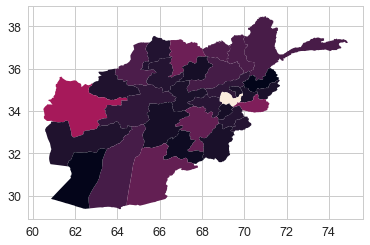

In [25]:
#Lets first plot the choropleth to check everything works fine. We'll do the styling afterwards
choropleth_df.plot(column='Total')

Perfect! Let's customize our choropleth to make it pretty :D

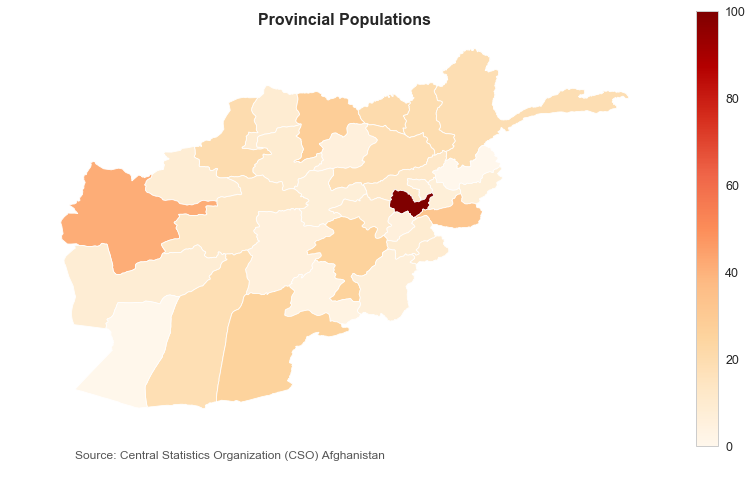

In [82]:
fig, ax = plt.subplots(figsize=(14,8))
choropleth_df.plot(column='Total', ax=ax, cmap='OrRd', linewidth=0.8, edgecolor='white')

ax.set_title('Provincial Populations', fontsize=16, fontweight='bold')
ax.annotate('Source: Central Statistics Organization (CSO) Afghanistan',
           xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left',
           verticalalignment='top', fontsize=12, color='#555555')

ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
cbar = fig.colorbar(sm)

As we can see, most of the urban population is concentration in the Kabul province in the capital city. The above graph shows the population in the given range of 1-100. We can get change the "scheme" of the map to "equal_interval" and "quantiles". But I think a better represenation would be to bin the population in deciles. So lets do that:

In [84]:
import pysal as ps #import Pysal
q10 = ps.Quantiles(choropleth_df.Total, k=10) #create the bins
q10.bins #get the bins

array([ 386929. ,  435995.6,  448248.2,  520545. ,  567079.5,  679978.4,
        943080.4, 1007659. , 1315976.2, 4372977. ])

In [86]:
q10.yb #get y values of the bins

array([7, 7, 4, 9, 8, 7, 1, 6, 4, 0, 3, 5, 9, 3, 2, 6, 2, 2, 9, 5, 9, 0,
       1, 4, 8, 5, 3, 1, 6, 0, 8, 0])

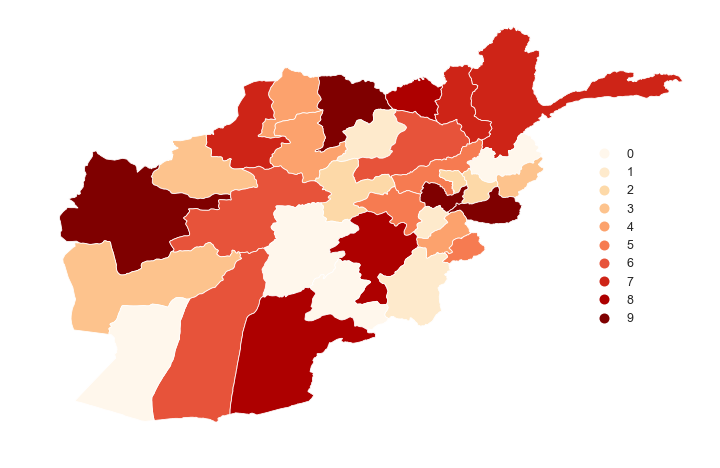

In [107]:
fig, ax = plt.subplots(figsize=(14,8))
#Use the assign method plot the bins on the choropleth
choropleth_df.assign(cl=q10.yb).plot(column='cl', ax=ax, cmap='OrRd', 
                                    linewidth=0.8, edgecolor='white',
                                    categorical=True, k=10,
                                   legend=True)
ax.set_axis_off()

#Change the location of the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.9, 0.7))

Visualizing urban and rural population counts across all provinces:

(59.785404586792, 75.6135898590088, 28.90508289337158, 38.94784908294677)

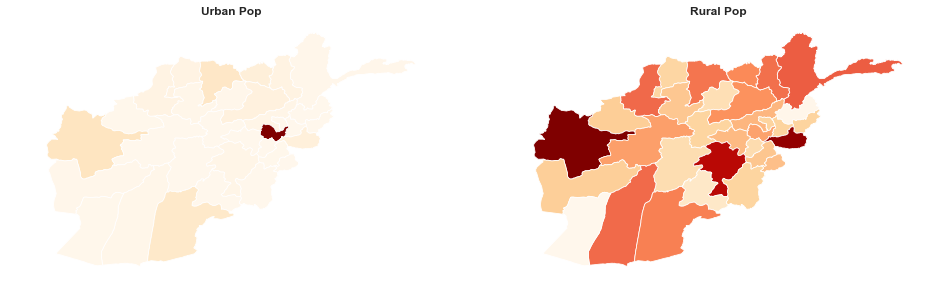

In [138]:
choropleth_df['Urban'] = choropleth_df['Urban'].fillna(0) #fill the missing Urban values with zeros

fig, axes = plt.subplots(ncols=2, figsize=(16,8)) #create two plots

choropleth_df.plot(column='Urban', ax=axes[0], cmap='OrRd', linewidth=0.8, edgecolor='white')
choropleth_df.plot(column='Rural', ax=axes[1], cmap='OrRd', linewidth=0.8, edgecolor='white')


axes[0].set_title('Urban Pop', fontsize=12, fontweight='bold')
axes[1].set_title('Rural Pop', fontsize=12, fontweight='bold')

axes[0].axis('off') ; axes[1].axis('off')

Visualizing male and female population counts across all provinces:

(59.785404586792, 75.6135898590088, 28.905082893371585, 38.947849082946775)

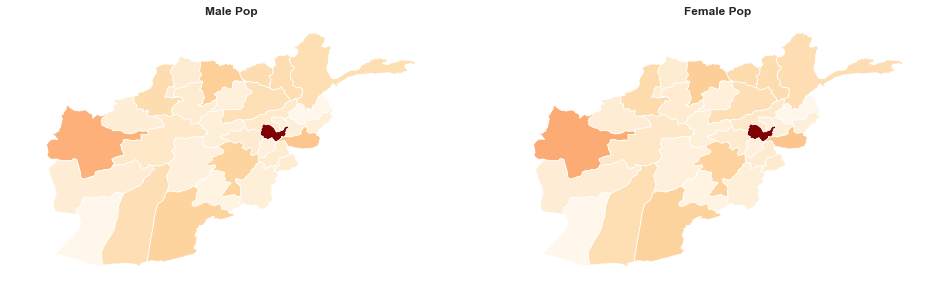

In [139]:
fig, axes = plt.subplots(ncols=2, figsize=(16,12)) #create two plots

choropleth_df.plot(column='Male', ax=axes[0], cmap='OrRd', linewidth=0.8, edgecolor='white')
choropleth_df.plot(column='Female', ax=axes[1], cmap='OrRd', linewidth=0.8, edgecolor='white')


axes[0].set_title('Male Pop', fontsize=12, fontweight='bold')
axes[1].set_title('Female Pop', fontsize=12, fontweight='bold')

axes[0].axis('off') ; axes[1].axis('off')

These last two maps show that female and male populations are more or less balanced in the country. This is also evident from the barplot earlier in the notebook where we compared male and female population counts.

## Interactive Plots

To be continued...